<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/6_2__Chemical_Space_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component analysis (PCA)
---
Made by: Ana Chávez, Fernanda Saldivar, Armando Rufino, Hector Ortíz and Karen Pelcastre

Contact: anachavez3026@gmail.com, fer.saldivarg@gmail.com

**Last Update:** March 2025

# Content
---

>[Principal component analysis (PCA)](#scrollTo=Jq5mPco1VWTX)

>[Content](#scrollTo=VNG8xReQroWq)

>[Objective](#scrollTo=oWhogeLdqW_r)

>[Introduction](#scrollTo=iP3iaxqGITyv)

>[1. Generate PCA](#scrollTo=_GPp6LwElJSH)

>>[1.1 Divide database](#scrollTo=8fUEqAOWhmXI)

>>[1.2 Normalize data](#scrollTo=9PCx5vP3YV5C)

>>[1.3 Train model](#scrollTo=Fz8A1tuej7oy)

>[For more information:](#scrollTo=uFsxKNdGdcJr)



# Objective
---

*   Introduce to the visualization fo chemical space.
*   Use methods of visualization of the chemical space to obtain profiles of chemical databases.
*   Generate visualizations of the chemical space using PCA.


# Introduction
---

The principal component analysis (PCA) is a linear reduction of dimensionality method that is used for the analysis of data sets with multiple correlated variables. This method searches the directions in which th data have the most variability and the it displays the data in a space with reduced dimensions defined by directions.
Next, we show the code to make a variable reduction through the PCA method.

In [ ]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Install rdkit
      !pip -q install rdkit.pypi==2021.9.4
      pbar.update(20)
      # Install Pillow
      !pip -q install Pillow
      pbar.update(40)
      # Install molplotly
      !pip install molplotly
      pbar.update(60)
      # Install jupyter-dash
      !pip install jupyter-dash
      pbar.update(80)
      # Install the dash design application
      !pip install dash-bootstrap-components
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import dash_bootstrap_components as dbc
from sys import argv

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

* RDKIT: https://www.rdkit.org/docs/GettingStartedInPython.html
* PANDAS: https://pandas.pydata.org/
* NUMPY: https://numpy.org/
* SKLEARN: https://scikit-learn.org/stable/

In [ ]:
#BIOFACQUIM
url_biofacquim = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/BIOFACQUIM.V2_curada.csv"
BIOFACQUIM = pd.read_csv(url_biofacquim)
BIOFACQUIM.head(2)

,ID,SMILES,Data set
0,FQNP502,c1cc2c(cc1C1OCC3C(c4ccc5c(c4)OCO5)OCC13)OCO2,BIOFACQUIM
1,FQNP281,C=C(C)C(C)(C)CCC(C)C1CCC2(C)C3CCC4C(C)(C)C5CCC...,BIOFACQUIM


In [ ]:
#FDA
url_fda = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/FDA_2022_july_05_curada.csv"
FDA = pd.read_csv(url_fda)
FDA.head(2)

,ID,SMILES,NEW_SMILES,Data set
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA


In [ ]:
#DNMT1
url_dnmt1 = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/DNMT1_curada.csv"
DNMT1 = pd.read_csv(url_dnmt1)
DNMT1.head(2)

,ID,SMILES,Data set
0,"""CHEMBL2336409",Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...,DNMT1
1,"""CHEMBL1361703",COc1ccccc1CNC(=O)COC(=O)c1cc(-c2ccco2)nc2ccccc12,DNMT1


In [ ]:
# Example of SMILES
smi = list(FDA["SMILES"])[150]
print(smi)

[H][C@]12SCC(CSC3=NN=NN3C)=C(N1C(=O)[C@]2(NC(=O)CSCC#N)OC)C(O)=O


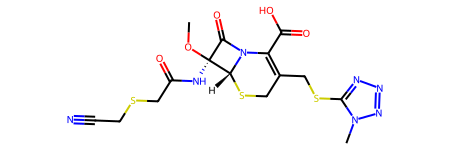

In [ ]:
# Example of a molecule
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
mol = Chem.MolFromSmiles(smi)
mol

In [ ]:
# See columns
print(FDA.columns)
print(BIOFACQUIM.columns)
print(DNMT1.columns)

Index(['ID', 'SMILES', 'NEW_SMILES', 'Data set'], dtype='object')
Index(['ID', 'SMILES', 'Data set'], dtype='object')
Index(['ID', 'SMILES', 'Data set'], dtype='object')


In [ ]:
# Select columns
FDA = FDA[['ID', 'NEW_SMILES', "Data set"]]
BIOFACQUIM = BIOFACQUIM[['ID', 'SMILES', "Data set"]]
DNMT1 = DNMT1[['ID', 'SMILES', "Data set"]]

# Change name to the columns
FDA.columns = ["ID", "SMILES", "Data set"]
BIOFACQUIM.columns = ['ID',  'SMILES', "Data set"]
DNMT1.columns = ["ID", "SMILES", "Data set"]
FDA.head(2)

,ID,SMILES,Data set
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA


In [ ]:
# Merge databases
DATA = pd.concat([FDA, BIOFACQUIM, DNMT1], axis=0).reset_index(drop=True)
DATA

,ID,SMILES,Data set
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA
2,DB00014,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(Cc1ccc(O)cc...,FDA
3,DB00027,CC(C)CC(NC(=O)CNC(=O)C(NC=O)C(C)C)C(=O)NC(C)C(...,FDA
4,DB00035,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCCC(=O)NC(C...,FDA
...,...,...,...
3226,"""CHEMBL4850038",COc1cc2c(=NCc3ccc(C4CCC(C(O)=NO)CC4)cc3)cc(-c3...,DNMT1
3227,"""CHEMBL4856550",COc1cc2[nH]c(-c3ccc(C)o3)cc(=NC3CCC(C(O)=NO)CC...,DNMT1
3228,"""CHEMBL4866673",COc1cc2c(=NCc3ccc(-c4ccc(C(O)=NO)cc4)cc3)cc(-c...,DNMT1
3229,"""CHEMBL4878570",ON=C(O)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,DNMT1


In [ ]:
# Generate descriptors
DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

In [ ]:
DATA.head(10)

,ID,SMILES,Data set,HBA,HBD,RB,LogP,TPSA,MW
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA,29,27,66,-8.32610,904.07,2180.317
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA,14,15,32,-1.43810,431.54,1209.421
2,DB00014,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(Cc1ccc(O)cc...,FDA,16,17,31,-3.10570,495.89,1269.433
3,DB00027,CC(C)CC(NC(=O)CNC(=O)C(NC=O)C(C)C)C(=O)NC(C)C(...,FDA,16,20,51,4.86760,519.89,1811.253
4,DB00035,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCCC(=O)NC(C...,FDA,15,14,19,-4.13203,435.41,1069.238
5,DB00050,CC(=O)NC(Cc1ccc2ccccc2c1)C(=O)NC(Cc1ccc(Cl)cc1...,FDA,16,16,38,-0.71580,498.17,1431.064
6,DB00067,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCC(N)C(=O)N...,FDA,16,15,19,-5.19483,461.43,1084.253
7,DB00080,CCCCCCCCCC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(CC(...,FDA,24,22,35,-5.62180,702.02,1620.693
8,DB00091,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C...,FDA,12,5,15,3.26900,278.80,1202.635
9,DB00104,CC(=O)C1NC(=O)C(CCCCN)NC(=O)C(Cc2c[nH]c3ccccc2...,FDA,15,13,17,-0.80540,332.22,1019.261


In [ ]:
#Save database
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#DATA.to_csv("/content/drive/MyDrive/4.Chemical_Space/Dataset.csv", sep=",", index=False)

In [ ]:
dataset = DATA[["Data set", "HBA", "HBD", "RB", "LogP", "TPSA", "MW"]]
dataset.head(5)

,Data set,HBA,HBD,RB,LogP,TPSA,MW
0,FDA,29,27,66,-8.32610,904.07,2180.317
1,FDA,14,15,32,-1.43810,431.54,1209.421
2,FDA,16,17,31,-3.10570,495.89,1269.433
3,FDA,16,20,51,4.86760,519.89,1811.253
4,FDA,15,14,19,-4.13203,435.41,1069.238


#*1. Generate PCA*
---

## 1.1 Divide database

In [ ]:
#Divide matrix
data = dataset.iloc[:,1:7].values # Select columns with descriptors
label = dataset.iloc[:,0].values # Select the database label of the columns

In [ ]:
pd.DataFrame(data).head(2)

,0,1,2,3,4,5
0,29.0,27.0,66.0,-8.3261,904.07,2180.317
1,14.0,15.0,32.0,-1.4381,431.54,1209.421


## 1.2 Normalize data
StandardScaler() standarizes the characteristics of the set of data in the unit scale (mean = 0 and variance = 1) that is a requirement for the optimal performance of many machine learning algorithms.

In [ ]:
# Normalize data
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

##1.3 Train model

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_std)
pca_results

array([[12.26627542,  0.2688375 ],
       [ 5.31202868,  0.27711511],
       [ 6.01725051, -0.20258812],
       ...,
       [ 0.30254128,  1.56406378],
       [ 0.22145159,  1.34390233],
       [ 0.03151497,  0.65994966]])

In [ ]:
# Select complementary information
label = DATA[["Data set", "ID", "SMILES"]]
label = label.to_numpy()

In [ ]:
# Concatenate numpy arrays
arr = np.concatenate((label, pca_results), axis = 1)
# Create a new dataframe
pca_dataset = pd.DataFrame(data=arr, columns = ['Data set',"ID", "SMILES",'component1', 'component2'])
pca_dataset.head(2)

,Data set,ID,SMILES,component1,component2
0,FDA,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,12.266275,0.268838
1,FDA,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,5.312029,0.277115


By doing the PCA method, there is a loss of correlation with each component, that is why it is necessary being able to identify the amount of correlation that we own for our visual representations, being able to determine if these are or not relevant by the amount of correlation that own with the original sample.

Finaly, it is intended to visualize the explained variance for each main visual component using a bar chart and a step chart. The "cum_sum_eigenvalues" variable is a numpy arrary that has the cummulative sum of the explained variance for each main component. Next, we use the"plt.bar()" function to create the bar chart of the explained variance for each main component and the "plt.step()" function to create the step chart of the cummulative explained variance. Finally we adjust the axis and display both charts using "plt.tight_layout()" and "plt.show()".

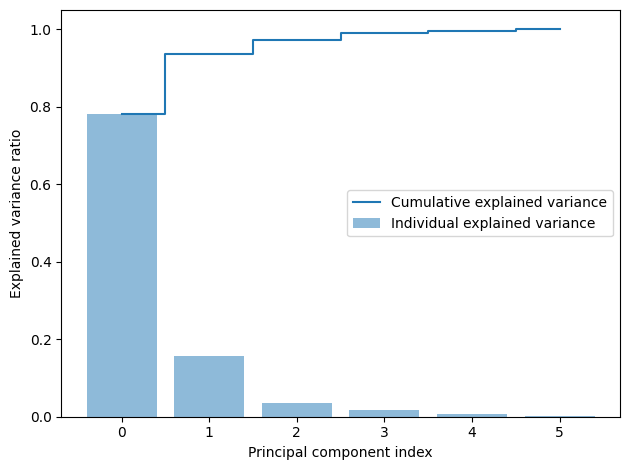

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
X_train_std = sc.transform(data)
#X_test_std = sc.transform(X_test)
# Instantiate PCA
pca = PCA()

# Determine transformed features
X_train_pca = pca.fit_transform(X_train_std)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
import matplotlib.pyplot as plt
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
#Variance value of each of the components
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca.round(4)

array([0.7811, 0.1557, 0.0361, 0.0182, 0.0058, 0.0031])

In [ ]:
pca_dataset.head(2)

,Data set,ID,SMILES,component1,component2
0,FDA,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,12.266275,0.268838
1,FDA,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,5.312029,0.277115


Now we are going to use **seaborn**  to make the PCA graph. In this graph, similar data point should be closer, making clusters. For this set of data we would like to see the different databases, making different groups. (By doing the scatter plot, the `DataBase` parameter corresponds with the color of the points).

In [ ]:
set(list(pca_dataset["Data set"]))

{'BIOFACQUIM', 'DNMT1', 'FDA'}

In [ ]:
#Plot
import plotly.express as px
import molplotly
fig_pca = px.scatter(pca_dataset,
                            x='component1',
                            y='component2',
                            #symbol='Minimum Degree',
                            color='Data set',
                            color_discrete_sequence=["indigo", "green", 'orange',],
                            title='PCA',
                            labels={'PC1': 'PC_1',
                                    'PC2': 'PC_2'},
                            width=700,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_pca,
                                         df=pca_dataset,
                                         smiles_col='SMILES',
                                         title_col='ID',
                                         color_col='Data set'
                                        )
#fig_pca.show()

app_marker.run(port=8060)

/usr/local/lib/python3.11/dist-packages/dash/dash.py:582: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

---
# For more information:
* Medina-Franco JL, Sánchez-Cruz N, López-López E, Díaz-Eufracio BI (2022) [Progress on open chemoinformatic tools for expanding and exploring the chemical space](https://link.springer.com/article/10.1007/s10822-021-00399-1). J Comput Aided Mol Des 36:341–354.
* Medina-Franco JL, Chávez-Hernández AL, López-López E, Saldívar-González FI (2022) [Chemical multiverse: An expanded view of chemical space. Mol Inf 41:2200116](https://onlinelibrary.wiley.com/doi/full/10.1002/minf.202200116).
* Saldívar-González FI, Medina-Franco JL (2022) [Approaches for enhancing the analysis of chemical space for drug discovery](https://www.tandfonline.com/doi/abs/10.1080/17460441.2022.2084608). Expert Opinion on Drug Discovery, 17:789-798.